In [27]:
import pandas as  pd
import numpy as np
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [28]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

training_set = datagen.flow_from_directory(
        "training_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

Found 8005 images belonging to 2 classes.


In [30]:
datagen1 = ImageDataGenerator(rescale=1./255)

test_set = datagen1.flow_from_directory(
        "test_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

Found 2023 images belonging to 2 classes.


In [31]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [32]:
cnn = tf.keras.models.Sequential()

In [33]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

In [34]:
#Pooling

In [35]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [36]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [37]:
cnn.add(tf.keras.layers.Flatten())

In [38]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [39]:
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [40]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 272,545 (1.04 MB)

 Trainable params: 272,545 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [42]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 161s 623ms/step - accuracy: 0.5230 - loss: 0.9835 - val_accuracy: 0.6263 - val_loss: 0.7502
Epoch 2/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 25s 99ms/step - accuracy: 0.6336 - loss: 0.7796 - val_accuracy: 0.7044 - val_loss: 0.7354
Epoch 3/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 25s 96ms/step - accuracy: 0.6675 - loss: 0.7083 - val_accuracy: 0.7232 - val_loss: 0.7116
Epoch 4/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 153ms/step - accuracy: 0.6863 - loss: 0.6690 - val_accuracy: 0.7370 - val_loss: 0.6954
Epoch 5/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 25s 96ms/step - accuracy: 0.7043 - loss: 0.6445 - val_accuracy: 0.7365 - val_loss: 0.6174
Epoch 6/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 24s 94ms/step - accuracy: 0.7192 - loss: 0.5968 - val_accuracy: 0.7469 - val_loss: 0.5738
Epoch 7/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 26s 101ms/step - accuracy: 0.7306 - loss: 0.5702 - val_accuracy: 0.7528 - val_loss: 0.5677
Epoch 8/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 26s 102ms/step - accuracy: 0.7355 - loss: 0.55

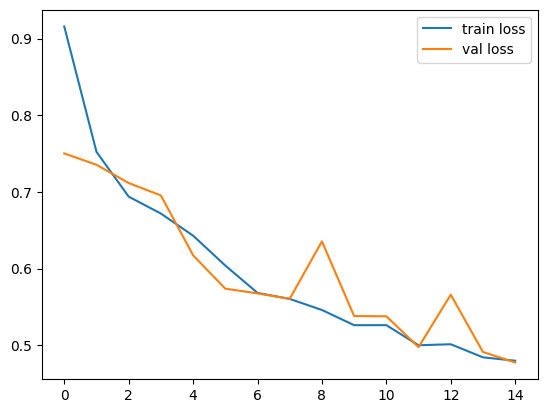

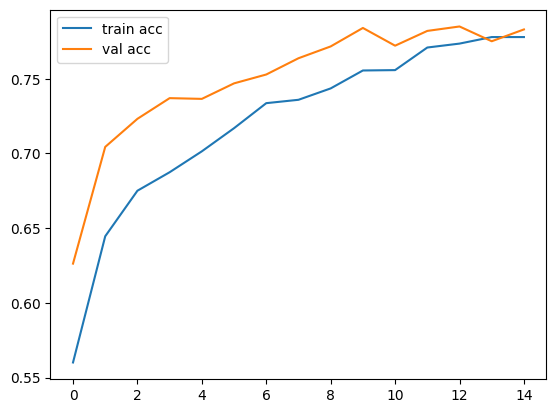

In [43]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [44]:
from tensorflow.keras.models import load_model

cnn.save('model_rcat_dog.h5')

In [45]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('training_set/dogs/dog.1023.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


In [46]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is dog


In [47]:
test_image1 = image.load_img('training_set/cats/cat.10.jpg', target_size = (64,64))
test_image1 = image.img_to_array(test_image1)
test_image1=test_image1/255
test_image1 = np.expand_dims(test_image1, axis = 0)
result = cnn.predict(test_image1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [48]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is cat


In [49]:
test_image2 = image.load_img('training_set/dogs/dog.310.jpg', target_size = (64,64))
test_image2 = image.img_to_array(test_image2)
test_image2=test_image2/255
test_image2 = np.expand_dims(test_image2, axis = 0)
result = cnn.predict(test_image2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [50]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is dog


In [56]:
# Save using the native Keras format
cnn.save('cat_dog_model.keras')

In [59]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Load the trained model
model = load_model('cat_dog_model.keras')

# Set up the ImageDataGenerator for preprocessing the test data
test_datagen = ImageDataGenerator(rescale=1./255)

In [60]:
# Define the path to your test dataset
test_data_dir = 'test_set'

# Load the test data using the ImageDataGenerator flow_from_directory method
test_set = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',  # Since it's a binary classification problem (cat vs dog)
    shuffle=False  # We don't want to shuffle the test data for proper evaluation
)

Found 2023 images belonging to 2 classes.


In [61]:


# Get the true labels for the test set
true_labels = test_set.classes  # The true labels from the test set

In [62]:

# Predict using the model
predictions = model.predict(test_set, verbose=1)  # Make predictions on the test data

# Convert probabilities to binary outcomes (0 for cat, 1 for dog)
predictions_binary = (predictions > 0.5).astype(int).flatten()  # Convert to 0 or 1


64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step


In [63]:

# Compute Accuracy, Precision, Recall, and F1-score
accuracy = accuracy_score(true_labels, predictions_binary)
precision = precision_score(true_labels, predictions_binary)
recall = recall_score(true_labels, predictions_binary)
f1 = f1_score(true_labels, predictions_binary)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7830
Precision: 0.8640
Recall: 0.6719
F1 Score: 0.7560
